**Due: 4 PM on Wednesday, 20 Apr 2016**

Instructions
-----

Write code to solve all problems. The grading rubric includes the following criteria:

- Correctness
- Readability
- Efficiency

Please do not copy answers found on the web or elsewhere as it will not benefit your learning. Searching the web for general references etc. is OK. Some discussion with friends is fine too - but again, do not just copy their answer. 

**Honor Code: By submitting this assignment, you certify that this is your original work.**

**Exercise 1 (25 points)**

Use Simple Monte Carlo Integration to estimate the function

$$
f(x) = x \cos 7x + \sin 13x, \ \  0 \le x \le 1
$$

Python code to do this is provided. 

Write parallel code to speed up this calculation using `ProcessPoolExecutor` with `concurrent.futures` or `multiprocessing` and as many cores as are available. Calculate the speed-up relative to the single processor version.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return x * np.cos(71*x) + np.sin(13*x)

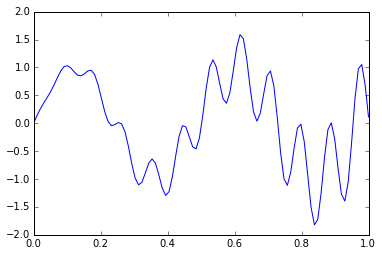

In [3]:
x = np.linspace(0, 1, 100)
plt.plot(x, f(x))
pass

In [4]:
n = 10000000
x = np.random.random(n)

In [5]:
%%time
y = 1.0/n * np.sum(f(x))
print(y)

0.0205676875889
CPU times: user 1.34 s, sys: 290 ms, total: 1.63 s
Wall time: 1.64 s


In [6]:
import multiprocessing
workers = multiprocessing.cpu_count()

In [7]:
%%time

def g(x):
    return np.sum(f(x))

parts = np.array_split(x, workers)
with multiprocessing.Pool() as pool:
    y = 1.0/n * np.sum(pool.map(g, parts))
print(y)

0.0205676875889
CPU times: user 120 ms, sys: 160 ms, total: 280 ms
Wall time: 2.85 s


**Exercise 2 (25 points)**

Write a `numba` GUFunc to calculate $Ax + b$, where $A$ is a $m \times n$ matrix, $x$ is a $n \times 1$ vector, and $b$ is a $m \times 1$ vector. Show that it works by applying to the followng data sets. The operation done without using GUFuncs is given.

In [5]:
m = 5
n = 4
k = 10

A = np.random.random((k,m,n))
x = np.random.random((k,n))
b = np.random.random((k,m))

In [6]:
res = np.zeros_like(b)
for i in range(k):
    res[i] = A[i].dot(x[i]) + b[i]

In [7]:
res

array([[ 1.88895695,  0.67592373,  0.99505008,  1.13362638,  0.87496415],
       [ 2.64940574,  2.03850419,  1.17483419,  1.43091379,  2.11274614],
       [ 2.44751628,  2.32025629,  1.99801138,  1.44941395,  1.87505693],
       [ 2.27767813,  2.00220485,  2.33836989,  1.94588846,  2.30113717],
       [ 1.92085933,  1.55896103,  0.68014893,  1.35547352,  1.49351938],
       [ 0.79619681,  1.61079005,  2.07460837,  1.13612248,  3.09438642],
       [ 1.28381144,  1.23755547,  1.19201473,  1.5762673 ,  1.75991416],
       [ 1.13035407,  1.54085211,  0.68884784,  1.09118856,  1.03824675],
       [ 1.71644564,  1.71199299,  2.48625019,  1.3570273 ,  1.67044827],
       [ 1.04393049,  1.30157517,  1.62809334,  1.58666131,  1.68681667]])

In [8]:
from numba import guvectorize, float64

In [9]:
@guvectorize([(float64[:, :], float64[:], float64[:], float64[:])], 
             '(m,n), (n), (m)->(m)')
def g(A, x, b, res):
    res += A.dot(x) + b

In [13]:
res = np.zeros_like(b)
g(A, x, b)

array([[ 1.88895695,  0.67592373,  0.99505008,  1.13362638,  0.87496415],
       [ 2.64940574,  2.03850419,  1.17483419,  1.43091379,  2.11274614],
       [ 2.44751628,  2.32025629,  1.99801138,  1.44941395,  1.87505693],
       [ 2.27767813,  2.00220485,  2.33836989,  1.94588846,  2.30113717],
       [ 1.92085933,  1.55896103,  0.68014893,  1.35547352,  1.49351938],
       [ 0.79619681,  1.61079005,  2.07460837,  1.13612248,  3.09438642],
       [ 1.28381144,  1.23755547,  1.19201473,  1.5762673 ,  1.75991416],
       [ 1.13035407,  1.54085211,  0.68884784,  1.09118856,  1.03824675],
       [ 1.71644564,  1.71199299,  2.48625019,  1.3570273 ,  1.67044827],
       [ 1.04393049,  1.30157517,  1.62809334,  1.58666131,  1.68681667]])

**Exercise 3 (50 points)**

Wrtie a pyspark program to find the top 10 words in the English Wikipedia dump in the `data` folder, using only articles from the directories that begin with `C`. Words should be converted to lowercase, stripped of all punctuation, and exclude strings consisting of all numbers. Exclude the following stop words:

```
a,able,about,across,after,all,almost,also,am,among,an,and,any,are,as,at,be,because,been,but,by,can,cannot,could,dear,did,do,does,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your
```

In [14]:
stop = set('a,able,about,across,after,all,almost,also,am,among,an,and,any,are,as,at,be,because,been,but,by,can,cannot,could,dear,did,do,does,either,else,ever,every,for,from,get,got,had,has,have,he,her,hers,him,his,how,however,i,if,in,into,is,it,its,just,least,let,like,likely,may,me,might,most,must,my,neither,no,nor,not,of,off,often,on,only,or,other,our,own,rather,said,say,says,she,should,since,so,some,than,that,the,their,them,then,there,these,they,this,tis,to,too,twas,us,wants,was,we,were,what,when,where,which,while,who,whom,why,will,with,would,yet,you,your'.split(','))

In [25]:
from pyspark import SparkContext
sc = SparkContext(master = 'local[*]')

In [30]:
text = sc.textFile('data/C*/wiki*')

In [31]:
import string

def tokenize(line):
    table = dict.fromkeys(map(ord, string.punctuation))
    return line.translate(table).lower().strip().split()

In [32]:
freqs = (text.flatMap(lambda line: tokenize(line))
         .filter(lambda word: word not in stop)
         .filter(lambda word: not word.isnumeric())
         .map(lambda word: (word, 1))
         .reduceByKey(lambda x, y: x+y))

In [33]:
freqs.cache()

PythonRDD[13] at RDD at PythonRDD.scala:43

In [34]:
freqs.takeOrdered(10, key=lambda x: -x[1])

[('doc', 124923),
 ('first', 36136),
 ('one', 32562),
 ('new', 31637),
 ('two', 24565),
 ('school', 22103),
 ('during', 19674),
 ('time', 19179),
 ('more', 18006),
 ('years', 16832)]

In [22]:
sc.stop()